In [ ]:
import pandas as pd
df=pd.read_csv("spam.csv")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.dtypes

v1    object
v2    object
dtype: object

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

<Axes: xlabel='v1', ylabel='count'>

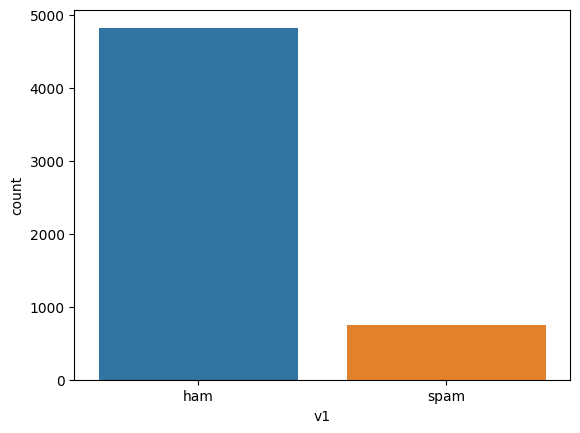

In [ ]:
import seaborn as sns
sns.countplot(x='v1',data=df)

In [ ]:
from sklearn.model_selection import train_test_split
x=df['v2']
y=df['v1']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train

3241    Good Morning my Dear........... Have a great &...
4619                          THIS IS A LONG FUCKIN SHOWR
4220    Plz note: if anyone calling from a mobile Co. ...
4317                 S...i will take mokka players only:)
270     Come to mu, we're sorting out our narcotics si...
                              ...                        
4180            Ok da, i already planned. I wil pick you.
2139    But i juz remembered i gotta bathe my dog today..
4475    I'll pick you up at about 5.15pm to go to taun...
5092    My fri ah... Okie lor,goin 4 my drivin den go ...
4357    Our dating service has been asked 2 contact U ...
Name: v2, Length: 4179, dtype: object

In [ ]:
x_test

760     Romantic Paris. 2 nights, 2 flights from å£79 ...
1394                 R we still meeting 4 dinner tonight?
4664                  Ok set let u noe e details later...
4244                          Is toshiba portege m100 gd?
3861                     Customer place, i wil cal u sir.
                              ...                        
2475                        Mm i am on the way to railway
4546    Hey mate. Spoke to the mag people. We‰Û÷re on....
2240                       K I'll call you when I'm close
571                 Do you know where my lab goggles went
2823      No need to buy lunch for me.. I eat maggi mee..
Name: v2, Length: 1393, dtype: object

In [ ]:
y_train

3241     ham
4619     ham
4220     ham
4317     ham
270      ham
        ... 
4180     ham
2139     ham
4475     ham
5092     ham
4357    spam
Name: v1, Length: 4179, dtype: object

In [ ]:
y_test

760     spam
1394     ham
4664     ham
4244     ham
3861     ham
        ... 
2475     ham
4546     ham
2240     ham
571      ham
2823     ham
Name: v1, Length: 1393, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x_train=vectorizer.fit_transform(x_train)


In [ ]:
x_test=vectorizer.transform(x_test)

In [ ]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)


SVC()

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_pred1=clf.predict(x_train)
y_pred1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.9834888729361091

In [ ]:
accuracy_score(y_pred1,y_train)

0.9961713328547499

In [ ]:
confusion_matrix(y_pred,y_test)

array([[1220,   23],
       [   0,  150]])

In [ ]:
confusion_matrix(y_pred1,y_train)

array([[3605,   16],
       [   0,  558]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [ ]:
yp=classifier.predict(x_test)
yp

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
yp1=classifier.predict(x_train)
yp1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [ ]:
accuracy_score(yp,y_test)

0.9863603732950467

In [ ]:
accuracy_score(yp1,y_train)

0.9932998324958124